<a href="https://colab.research.google.com/github/Siddharthg97/Covid-19-dashboard/blob/main/QR2001_OR2_(1_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-I (QR2001)
#                                      Potential Reducion Method 

### Consider the problem:  Y = AX + q  where $$X\geq 0,Y\geq0, X^T Y =0$$
$$Step\space0 : s > 0,\space\space\space\space\space\epsilon > 0,\space\space\space\space\space \alpha\in(0,1),\space\space\space\space\space \bar{\beta} \in [0,1),\space\space\space\space\space\sigma>0,\space\space\space\space\space\rho\in (0,1)$$
$$Choose \space Z^0\space:=(X^0, Y^0)\space where, \space X^0, Y^0 \in R_+^n,\space\beta_0 \in [0,\bar{\beta}),\space k=0 $$

#### $$Step\space 1\space :\space Solve \space the \space system \space of \space Equations\space M(\Delta X) = \space N $$
$$ \begin{bmatrix}
Y^k & X^k \\
-A & I 
\end{bmatrix} 
%
\begin{bmatrix}
\Delta x^k \\
\Delta y^k 
\end{bmatrix} 
=
\begin{bmatrix}
- X^k Y + \beta \dfrac{(X^k)^T}{n} Ye \\
- Y^k + AX + q
\end{bmatrix} \space\space\space to\space obtain\space the\space d^k:= \space (\Delta X^k, \Delta Y^k), \space e\space is\space vector\space of\space \bar{1}$$

#### $$Step\space 2\space :\space Let \space l_k \space be \space the \space smallest\space non-negative\space integer-l,\space such\space that\space the\space following\space conditions\space holds: Z^k + \sigma \rho ^l d^k \in R_+^n \times R_+^n $$
$$\phi (Z^k + \sigma \rho ^l d^k) - \phi (Z^k) \leq \alpha \sigma \rho^l(1-\beta^k )s ,\space and\space Z:=(X,Y),\space s>0\\ $$
$$where, \space \phi (Z) = (n+s) \space \ln (X^T Y + ||Y - AX-q||_2^2 )- \sum_{n=1}^{n} \ln x_i y_i \\ $$
$$ Set,\space Z^{k+1} = Z^k + \sigma \rho ^l d^k \\ $$

#### $$Step\space 3\space :\space Termination \space Verification $$
$$ If\space  z_{k+1} \space satisfies : f(z^{k+1}) = (X^{k+1})^T(Y^{k+1}) + ||Y^{k+1} - AX^{k+1} - q||_2^2 < \epsilon$$
$$then\space  z_{k+1}\space  is\space  an\space  approximate  \space solution\space  of\space Y=AX+q, \space x,y\geq 0 ,\space X^T Y=0 \\ $$ 
$$ Else\space If\space  z_{k+1} \space - z_k < \epsilon \space \ln x_j^{k+1} y_j^{k+1} = 0 \space for \space some \space j, \space then \space z_{k+1} \space is\space  an\space  approximate  \space solution\space$$  
$$ Otherwise, \space pick \space any \space \beta_{k+1} \in [0,\bar{\beta }] \space and \space return \space to \space Step \space 1 \space with \space k=k+1 $$

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Results

# Exercise-1

In [2]:
df=pd.read_csv("/content/Ex1.csv",header=None)
df=df.iloc[:,:17]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,0,-1,-4,0,0,0.6,0.6,-0.4,-0.4,0,0,0,0,0
1,0,0,0,0,-2,-3,0,0,1.0,1.0,-0.8,-0.8,0,0,0,0,0
2,0,0,0,0,0,0,-1,-4,0.0,0.0,1.0,1.0,0,0,-1,1,0
3,0,0,0,0,0,0,-5,-1,0.0,0.0,1.0,1.0,0,0,-1,1,0
4,1,2,0,0,0,0,0,0,-1.0,-1.0,0.0,0.0,1,-1,0,0,0
5,4,3,0,0,0,0,0,0,-1.0,-1.0,0.0,0.0,1,-1,0,0,0
6,0,0,1,5,0,0,0,0,0.4,0.4,-0.6,-0.6,0,0,0,0,0
7,0,0,4,1,0,0,0,0,0.8,0.8,-1.0,-1.0,0,0,0,0,0
8,-1,-1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,1
9,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,-1


# Initialization of Parameters

In [ ]:
a = np.array(df.iloc[:,:-1])
q = np.array(df.iloc[:,-1])
n = a.shape[0]
S = np.array([0.1,0.2,0.25,0.4,0.45,0.5,0.65,0.7,0.8,0.9])
s=round(random.choice(S),2)
epsilon = 10**-4
alpha,rho = 0.0002,0.1 

beta_bar = 0.002
sigma = 9*10**11

z = np.random.randint(1,10,2*n)
e = np.ones(n)
beta = 0.0002 

print("alpha =",alpha,", beta_bar =",beta_bar,",rho =",rho, 
      ", s=",s,", sigma=",sigma,", beta =",beta)




max_iter=int(input("Please provide the number of iterations after which x and y values are required :"))



alpha = 0.0002 , beta_bar = 0.002 ,rho = 0.1 , s= 0.1 , sigma= 900000000000 , beta = 0.0002
Please provide the number of iterations after which x and y values are required :56


# Algorithm

In [ ]:
#---------------------------------------------------------------------------------------------------------
# Step1
#---------------------------------------------------------------------------------------------------------

#Func to find Phi(z)
def phi(z):
    x = z[:n]
    y = z[n:]
    return ((n+s)*np.log(np.dot(x,y) + (np.linalg.norm(y - np.dot(a,x) - q))**2)) - sum(np.log(np.multiply(x,y)))

#Func to terminate 
def f(z):
  x = z[:n]
  y = z[n:]
  return np.dot(x,y) + pow(np.linalg.norm(y - np.dot(a,x) - q),2)

k=0
list1=[]
for i in range (max_iter): 
  k=k+1
  print("="*30,k,"- epoch","="*30)
    
  #Solving Linear Equation A (Delta X) = B
  A = np.vstack((np.hstack((np.diag(z[n:]), np.diag(z[:n]))),np.hstack((-a, np.eye(n)))))
  B = np.vstack((((-1)*np.dot(np.diag(z[:n]),z[n:]) + (beta*np.dot(z[:n],z[n:]))/n*e).reshape(n,1),(-z[n:]+np.dot(a,z[:n])+q).reshape(n,1)))
  delta_X = np.linalg.solve(A, B)

  #---------------------------------------------------------------------------------------------------------
  # Step2
  #---------------------------------------------------------------------------------------------------------
  
  #Finding l = smallest non-negative integer then find z^{k+1}  
  l = 0
  while True:
    threshold = (-1)* alpha*sigma*(1-beta)*s*rho**l
    z_new = z + sigma*(rho**l)*delta_X.ravel()
    
    # If any element in X and Y are non-positive then phi(z) not calculated, proceed to next iteration
    # If all elements in X and Y are positive (>0) then only phi(z) should be calculated 
    if (z_new>0).all() and phi(z_new)- phi(z) <= threshold :
        z = z_new
        break
    else:
      l=l+1
  #print("l = ",l)
  
  #---------------------------------------------------------------------------------------------------------
  # Step 3
  #---------------------------------------------------------------------------------------------------------
  #if (f(z)  < epsilon) and round(np.dot(z[:n],z[n:]),4)==0:
   # print(f(z),np.round(z[:n],2),np.round(z[n:],2))
    #break
  #elif (np.linalg.norm(z_new - z) <epsilon) and (np.multiply(z_new[:n],z_new[n:])==1).any() :
   # print(z_new[:n],z_new[n:])
    #break
  #else:
   # print(f(z) ,epsilon)
    #print(" beta=",round(beta,2),"X=",x,"Y=",y, "-",l,"==",np.dot(x_new,y_new) + np.linalg.norm(y_new - np.dot(a,x_new) - q)**2)
        
    #Updating beta, X, Y for next Iteration
  beta = np.random.uniform(0,beta_bar)
  print("f(z)",f(z))
  list1.append(f(z))

============================== 1 - epoch ==============================
f(z) 5282.2554463758
============================== 2 - epoch ==============================
f(z) 4405.640303395541
============================== 3 - epoch ==============================
f(z) 3676.9466705204904
============================== 4 - epoch ==============================
f(z) 3070.919953043578
============================== 5 - epoch ==============================
f(z) 2566.5154932003575
============================== 6 - epoch ==============================
f(z) 2146.4076273840874
============================== 7 - epoch ==============================
f(z) 1796.1780244841993
============================== 8 - epoch ==============================
f(z) 1502.949291733541
============================== 9 - epoch ==============================
f(z) 1257.9541437748485
============================== 10 - epoch ==============================
f(z) 1055.9865270852401
============================== 11 - epoch ===

# Results

X =  [1.800e-01 8.900e-01 6.600e-01 3.900e-01 1.010e+00 1.000e-02 4.400e-01
 6.300e-01 6.350e+00 4.900e+00 9.750e+00 1.790e+00 1.474e+01 5.200e+00
 1.103e+01 2.530e+00]
Y =  [1.24 0.1  0.23 0.35 0.22 1.51 0.06 0.44 0.   0.06 0.   0.02 0.02 0.04
 0.01 0.04]
Epochs :  56
f(z) values= [5282.2554463758, 4405.640303395541, 3676.9466705204904, 3070.919953043578, 2566.5154932003575, 2146.4076273840874, 1796.1780244841993, 1502.949291733541, 1257.9541437748485, 1055.9865270852401, 887.5667992811291, 747.0313037831891, 629.5918301911245, 531.3534423479751, 449.10440428653715, 380.18647060180615, 322.358236757559, 273.8032811793332, 232.98630938962742, 198.62437527620528, 169.65920087357898, 145.2157926486424, 124.55536692977189, 107.06453834653328, 92.23317534624783, 79.63190421753816, 68.90755954517485, 59.76585478029387, 51.952730644973585, 45.26280138733205, 39.52692340204737, 34.59471472870399, 30.343572186592354, 26.67257302557132, 23.492781798893766, 20.73582083586758, 18.338172907184685,

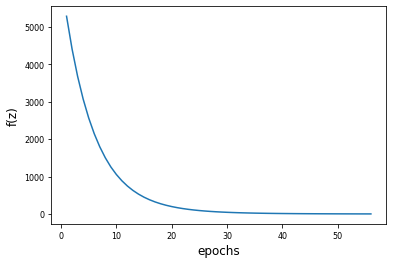

In [ ]:
print("X = ",np.round(z[:n],2))
print("Y = ",np.round(z[n:],2))
print("Epochs : ",k)
print("f(z) values=",list1)

x=range(1,len(list1)+1)
fig,ax=plt.subplots()
plt.plot(x,list1)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
plt.xlabel("epochs",fontsize="12")
plt.ylabel("f(z)",fontsize="12")
plt.savefig("Exercise-6.png",dpi=400)
plt.show()

print("X = ",np.round(z[:n],2))
print("Y = ",np.round(z[n:],2))
print("Epoch =",k)

# Exercise-2

In [3]:
df=pd.read_csv("/content/Ex-2.csv",header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-0.5,0.5,0.0,0.0,0.5,-0.5,0.0,0.0,-4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-0.5,0.5,0.0,0.0,0.5,-0.5,0.0,0.0,-5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-0.5,0.5,0.0,0.0,0.5,-0.5,-3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-0.5,0.5,0.0,0.0,0.5,-0.5,-4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.5,0.0,0.0,0.5,-0.5,0.0,0.0,3.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.5,-0.5,0.0,0.0,0.5,-0.5,6.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.5,0.0,0.0,0.5,-0.5,6.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.5,-0.5,-1.0,1.0,0.5,-0.5,0.0,0.0,2.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.5,0.0,0.0,0.5,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.5,0.0,0.0,0.5,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
a = np.array(df.iloc[:,:-1])
q = np.array(df.iloc[:,-1])
n = a.shape[0]
s = 0.5
epsilon = 10**-4
alpha,rho = 0.0002,0.1

beta_bar = 0.001 
sigma = 9*10**11

z = np.random.randint(1,10,2*n)
e = np.ones(n)
beta = 0.25 
print("alpha =",round(alpha,2),", beta_bar =",round(beta_bar,2),", rho =",round(rho,2), 
      " s=",s," sigma=",sigma," rho=",round(rho,2)," beta",round(beta,2))

max_iter=int(input("Please provide the number of iterations after which x and y values are required :"))


alpha = 0.0 , beta_bar = 0.0 , rho = 0.1  s= 0.5  sigma= 900000000000  rho= 0.1  beta 0.25
Please provide the number of iterations after which x and y values are required :200


# Algorithm

In [6]:
#---------------------------------------------------------------------------------------------------------
# Step1
#---------------------------------------------------------------------------------------------------------

#Func to find Phi(z)
def phi(z):
    x = z[:n]
    y = z[n:]
    return ((n+s)*np.log(np.dot(x,y) + (np.linalg.norm(y - np.dot(a,x) - q))**2)) - sum(np.log(np.multiply(x,y)))

#Func to terminate 
def f(z):
  x = z[:n]
  y = z[n:]
  return np.dot(x,y) + pow(np.linalg.norm(y - np.dot(a,x) - q),2)

k=0
list1=[]
for i in range (max_iter): 
  k=k+1
  print("="*30,k,"- epoch","="*30)
    
  #Solving Linear Equation A (Delta X) = B
  A = np.vstack((np.hstack((np.diag(z[n:]), np.diag(z[:n]))),np.hstack((-a, np.eye(n)))))
  B = np.vstack((((-1)*np.dot(np.diag(z[:n]),z[n:]) + (beta*np.dot(z[:n],z[n:]))/n*e).reshape(n,1),(-z[n:]+np.dot(a,z[:n])+q).reshape(n,1)))
  delta_X = np.linalg.solve(A, B)

  #---------------------------------------------------------------------------------------------------------
  # Step2
  #---------------------------------------------------------------------------------------------------------
  
  #Finding l = smallest non-negative integer then find z^{k+1}  
  l = 0
  while True:
    threshold = (-1)* alpha*sigma*(1-beta)*s*rho**l
    z_new = z + sigma*(rho**l)*delta_X.ravel()
    
    # If any element in X and Y are non-positive then phi(z) not calculated, proceed to next iteration
    # If all elements in X and Y are positive (>0) then only phi(z) should be calculated 
    if (z_new>0).all() and phi(z_new)- phi(z) <= threshold :
        z = z_new
        break
    else:
      l=l+1
  #print("l = ",l)
  
  #---------------------------------------------------------------------------------------------------------
  # Step 3
  #---------------------------------------------------------------------------------------------------------
  #if (f(z)  < epsilon) and round(np.dot(z[:n],z[n:]),4)==0:
   # print(f(z),np.round(z[:n],2),np.round(z[n:],2))
    #break
  #elif (np.linalg.norm(z_new - z) <epsilon) and (np.multiply(z_new[:n],z_new[n:])==1).any() :
   # print(z_new[:n],z_new[n:])
    #break
  #else:
   # print(f(z) ,epsilon)
    #print(" beta=",round(beta,2),"X=",x,"Y=",y, "-",l,"==",np.dot(x_new,y_new) + np.linalg.norm(y_new - np.dot(a,x_new) - q)**2)
        
    #Updating beta, X, Y for next Iteration
  beta = np.random.uniform(0,beta_bar)
  print("f(z)",f(z))
  list1.append(f(z))

============================== 1 - epoch ==============================
f(z) 18389.736755397837
============================== 2 - epoch ==============================
f(z) 18357.310493186764
============================== 3 - epoch ==============================
f(z) 18324.935180410204
============================== 4 - epoch ==============================
f(z) 18292.610245146803
============================== 5 - epoch ==============================
f(z) 18260.334851470914
============================== 6 - epoch ==============================
f(z) 18228.106422012937
============================== 7 - epoch ==============================
f(z) 18195.92430777396
============================== 8 - epoch ==============================
f(z) 18163.785294835412
============================== 9 - epoch ==============================
f(z) 18131.686390897612
============================== 10 - epoch ==============================
f(z) 18099.62383700899
============================== 11 - epoch

X =  [  4.64   6.82   7.83   4.84   3.11   0.84   3.83   1.07   1.08   6.78
   5.01   6.03   3.74   7.76   2.96   3.94   6.27   1.18   3.01   5.68
   7.69   2.99   7.64   7.21   4.13   8.45   2.01   3.     6.94   8.03
   1.02   2.01   1.84   1.53   4.34   3.37   8.4   12.2  107.08 107.74]
Y =  [2.11 5.01 2.99 1.02 2.83 2.37 7.14 3.68 4.54 2.59 4.87 1.95 7.31 3.39
 3.97 1.99 7.46 3.34 3.89 4.12 6.08 3.9  7.14 2.17 8.51 4.16 5.83 1.97
 2.95 8.74 1.95 5.84 9.55 3.19 5.39 7.8  0.31 3.28 0.06 0.12]
Epochs :  200
f(z) values= [18389.736755397837, 18357.310493186764, 18324.935180410204, 18292.610245146803, 18260.334851470914, 18228.106422012937, 18195.92430777396, 18163.785294835412, 18131.686390897612, 18099.62383700899, 18067.592354083157, 18035.5844450539, 18003.58869373133, 17971.58940861618, 17968.42185542513, 17965.2547751516, 17962.088109261775, 17958.9219058267, 17955.75610615646, 17952.590791701674, 17949.42587180498, 17946.261346281644, 17943.09724243047, 17939.9335407451, 17936.770

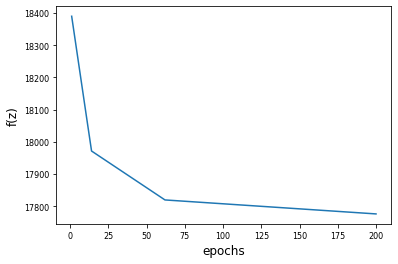

In [7]:
print("X = ",np.round(z[:n],2))
print("Y = ",np.round(z[n:],2))
print("Epochs : ",k)
print("f(z) values=",list1)

x=range(1,len(list1)+1)
fig,ax=plt.subplots()
plt.plot(x,list1)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
plt.xlabel("epochs",fontsize="12")
plt.ylabel("f(z)",fontsize="12")
plt.savefig("Exercise-7.png",dpi=400)
plt.show()